In [6]:
from fabrictestbed_extensions.fablib.fablib import FablibManager as fablib_manager
fablib = fablib_manager()


### Initial set up for experiment

In [7]:
try:
    import numpy as np
    import pandas as pd
    import plotly.express as px
    import kaleido
    import scapy
    import matplotlib.pyplot as plt
except:
    !pip install plotly
    !pip install -U kaleido
    !pip install scapy
    import os
    os._exit(00)

In [8]:
slice_gpu_name="CNERT 3"

rtx6000_node_name='rtx1'

In [9]:
slice_gpu = fablib.get_slice(name=slice_gpu_name)
node_gpu = slice_gpu.get_node(name=rtx6000_node_name)




## Check if video files are uploaded to nodes

In [10]:
stdout, stderr = node_gpu.execute("ls")
if "input.mp4" not in stdout:
    print("uploading")
    node_gpu.upload_file('input.mp4', 'input.mp4')
    # node_gpu.upload_file("req.txt","req.txt")
    node_gpu.upload_file("object_detection.py","object_detection.py")
    # node_gpu.execute("pip3.9 install -r req.txt")


hello_world
hello-world.cu
jupyter-examples
nat64.sh
req.txt
uploading


In [25]:
node_gpu.upload_file("object_detection.py","object_detection.py")

<SFTPAttributes: [ size=6801 uid=1000 gid=1000 mode=0o100664 atime=1673742680 mtime=1673744627 ]>

In [26]:
# node_gpu.execute("rm output.webm")
_,_ = node_gpu.execute(f"python3.9 object_detection.py input.mp4 1")

processing unit: cpu, thread count:1
cpu available
Overall time taken: 424.5939874649048
processing unit: cpu, thread count:0
Overall time taken: 2.1457672119140625e-06
processing unit: cpu, thread count:-2
Overall time taken: 1.430511474609375e-06
processing unit: cuda, thread count:1
cuda available
Overall time taken: 391.2778630256653
processing unit: cuda, thread count:0
Overall time taken: 3.814697265625e-06
processing unit: cuda, thread count:-2
Overall time taken: 1.6689300537109375e-06
 Using cache found in /home/rocky/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-1-15 Python-3.9.13 torch-1.10.1+cu102 CUDA:0 (Quadro RTX 6000, 22691MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
OpenCV: FFMPEG: tag 0x30395056/'VP90' is not supported with codec id 167 and format 'webm / WebM'
Using cache found in /home/rocky/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-1-15 Python-3.9.13 torch-1.10.1+cu102 CUDA:0 (Qu

In [27]:
node_gpu.download_file("results.csv","results.csv")

In [28]:
df = pd.read_csv("results.csv")

In [29]:
# df.count()
df

,Unnamed: 0,time,thread,thread_n,processing_unit,total_frames,fps_mean,fps_max,fps_min,label_count_mean,overall_time
0,0,424.593290,0.0,1,cpu,341.0,12.048884,14.492754,2.976190,2.152493,424.593987
1,0,391.277146,0.0,1,cuda,341.0,83.054140,90.909091,2.347418,2.152493,391.277863


In [30]:
# node_gpu.execute("rm output.webm")
_,_ = node_gpu.execute(f"python3.9 object_detection.py input.mp4 5")
node_gpu.download_file("results.csv","results.csv")
df = pd.read_csv("results.csv")

processing unit: cpu, thread count:5
cpu available
cpu available
cpu available
cpu available
cpu available
Overall time taken: 599.7044816017151
processing unit: cpu, thread count:0
Overall time taken: 2.3365020751953125e-05
processing unit: cpu, thread count:-2
Overall time taken: 1.6689300537109375e-06
processing unit: cuda, thread count:5
cuda available
cuda available
cuda available
cuda available
cuda available
Overall time taken: 511.2638375759125
processing unit: cuda, thread count:0
Overall time taken: 2.7418136596679688e-05
processing unit: cuda, thread count:-2
Overall time taken: 1.9073486328125e-06
 Using cache found in /home/rocky/.cache/torch/hub/ultralytics_yolov5_master
Using cache found in /home/rocky/.cache/torch/hub/ultralytics_yolov5_master
Using cache found in /home/rocky/.cache/torch/hub/ultralytics_yolov5_master
Using cache found in /home/rocky/.cache/torch/hub/ultralytics_yolov5_master
Using cache found in /home/rocky/.cache/torch/hub/ultralytics_yolov5_master
YO

In [ ]:
# node_gpu.execute("rm output.webm")
_,_ = node_gpu.execute(f"python3.9 object_detection.py input.mp4 3")
node_gpu.download_file("results.csv","results.csv")
df = pd.read_csv("results.csv")

In [ ]:
# node_gpu.execute("rm output.webm")
_,_ = node_gpu.execute(f"python3.9 object_detection.py input.mp4 1")
node_gpu.download_file("results.csv","results.csv")


In [124]:
df1 = pd.read_csv("results_1.csv")
df2 = pd.read_csv("results_3.csv")
df3 = pd.read_csv("results_5.csv")
df_list = [df1, df2, df3]
df = pd.concat(df_list)

In [133]:
df

,Unnamed: 0,time,thread,thread_n,processing_unit,total_frames,fps_mean,fps_max,fps_min,label_count_mean,overall_time
0,0,423.674350,0.0,1,cpu,341.0,12.699826,15.384615,1.792115,2.152493,423.675056
1,0,397.644149,0.0,1,cuda,341.0,72.199694,90.909091,2.288330,2.152493,397.645440
0,0,525.468139,0.0,3,cpu,341.0,4.641581,14.285714,0.033852,2.152493,525.468813
1,1,463.509700,1.0,3,cpu,341.0,4.790638,5.555556,1.234568,2.152493,525.468813
2,2,494.910772,2.0,3,cpu,341.0,4.606060,5.434783,1.245330,2.152493,525.468813
3,0,392.289654,0.0,3,cuda,341.0,76.821242,83.333333,0.959693,2.152493,452.800988
4,1,452.798857,1.0,3,cuda,341.0,66.542769,83.333333,0.988142,2.152493,452.800988
5,2,420.909848,2.0,3,cuda,341.0,71.965567,90.909091,1.024590,2.152493,452.800988
0,0,539.512413,0.0,5,cpu,341.0,4.136688,5.649718,0.017332,2.152493,599.704482
1,1,568.563066,1.0,5,cpu,341.0,4.018793,5.617978,0.034234,2.152493,599.704482


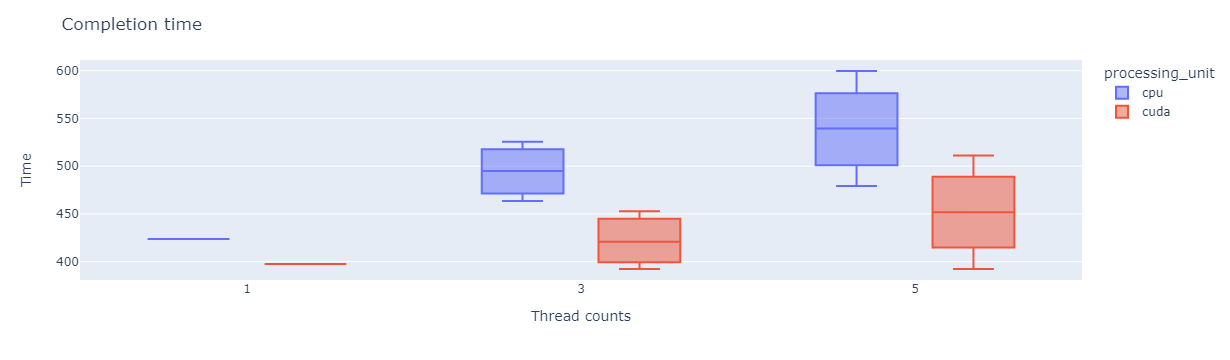

In [139]:
fig = px.box(df, x="thread_n", y="time", color="processing_unit")
fig.update_layout(xaxis=dict(title='Thread counts'), yaxis=dict(title='Time'), showlegend=True,
                  title='Completion time')
fig.show()
fig.write_image("metrics/Boxplot time by thread groups.pdf")

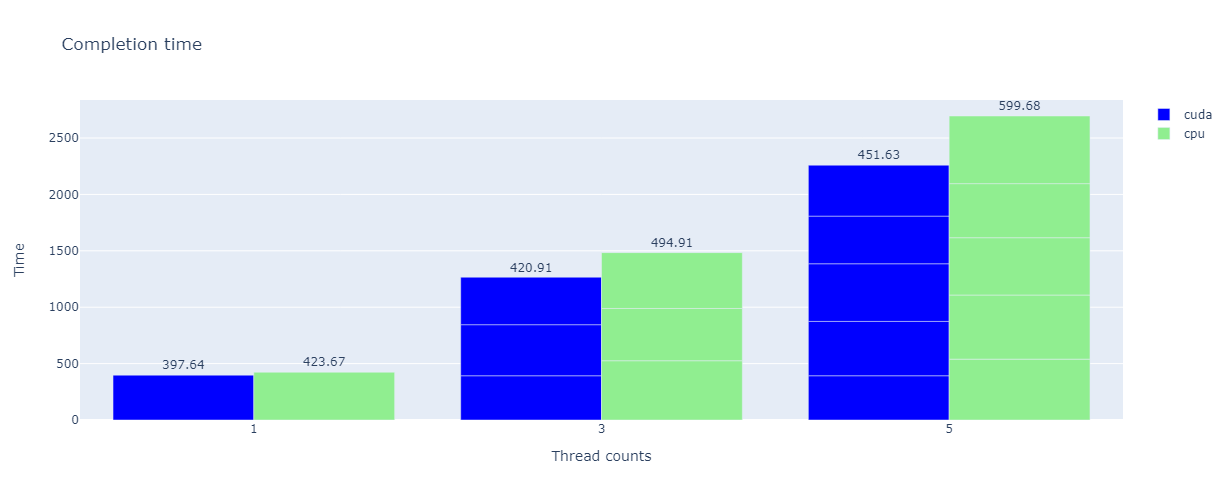

In [138]:
df = pd.concat(df_list)
df_cuda = df[df['processing_unit'] == 'cuda']
df_cpu = df[df['processing_unit'] == 'cpu']

fig = go.Figure()
fig.add_trace(go.Bar(x=df_cuda['thread_n'], y=df_cuda['time'], name='cuda', text=df_cuda['time'].round(2),textposition='outside',
                    marker=dict(color='blue')))
fig.add_trace(go.Bar(x=df_cpu['thread_n'], y=df_cpu['time'], name='cpu', text=df_cpu['time'].round(2), textposition='outside',
                    marker=dict(color='lightgreen')))
fig.update_layout(xaxis=dict(title='Thread counts'), yaxis=dict(title='Time'), showlegend=True, bargap=0.19,
                  title='Completion time')
fig.update_layout(width=800, height=500)
fig.show()
fig.write_image("metrics/Completion time by thread groups.pdf")

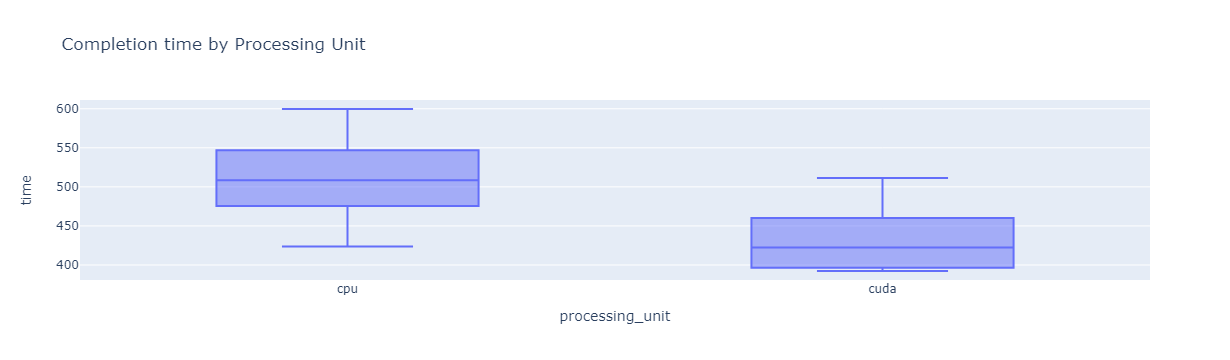

In [126]:
import plotly.express as px

fig = px.box(data_frame=df, x='processing_unit', y='time', labels={'fps_mean':'FPS Mean'},
             title='Completion time by Processing Unit')
fig.show()
fig.write_image("metrics/Completion time by Processing Unit for 5 threads at a time.pdf")

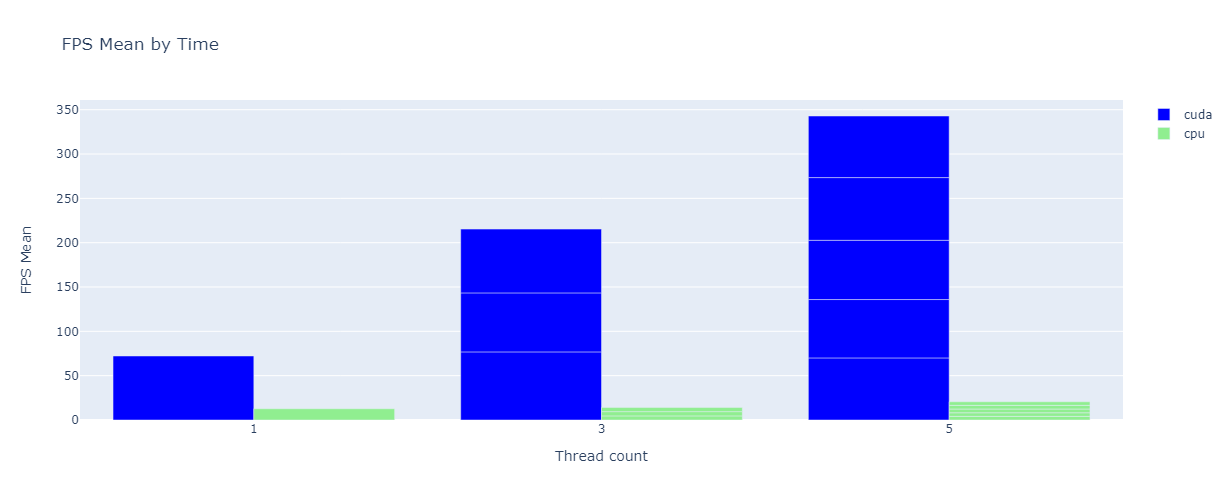

In [137]:
import plotly.graph_objs as go

df_cuda = df[df['processing_unit'] == 'cuda']
df_cpu = df[df['processing_unit'] == 'cpu']

fig = go.Figure()
fig.add_trace(go.Bar(x=df_cuda['thread_n'], y=df_cuda['fps_mean'], name='cuda',
                    marker=dict(color='blue')))
fig.add_trace(go.Bar(x=df_cpu['thread_n'], y=df_cpu['fps_mean'], name='cpu',
                    marker=dict(color='lightgreen')))
fig.update_layout(xaxis=dict(title='Thread count'), yaxis=dict(title='FPS Mean'), showlegend=True, bargap=0.19,
                  title='FPS Mean by Time')
fig.update_layout(width=800, height=500)
fig.show()
fig.write_image("metrics/FPS Mean by Time.pdf")

In [141]:
# node22.download_file("output.mp4","output.mp4")
node_gpu.download_file("output.webm","output.webm")

In [144]:
# Download a static FFmpeg build and add it to PATH.
%run 'util/load-ffmpeg.ipynb'
print('Done!')

./ffmpeg-5.1.1-amd64-static/ffmpeg
Done!


In [143]:
%run util/play-video.ipynb --ref input.mp4 --tar output.webm
HTML(html)